<a href="https://colab.research.google.com/github/LEEHYUNJI94/Python/blob/master/Function.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## ▶함수
### 0.퍼스트 클래스& SCOPE 이해하기

In [44]:
######퍼스트클래스######
def first_class(x):
    return x * x

print(first_class(5))

first = first_class

print(first(5))


def first_class2(func, arg_list):                #1
# def first_class2(arg_list):                    #2
    result = []
    for i in arg_list:
      # result.append(i*i)                       #2
      result.append(func(i))                     #1     first_class 함수 호출, func == first_class
    return result
first_class_list = [1, 2, 3, 4, 5]

# print(first_class2(first_class_list))          #2

result1 = first_class2(first_class, first_class_list)   #1

print(result1)


######스코프 이해하기######
 x=1
 def scope1():
  #  global x
   x=2 
   print("scope1의 결과",x)
 def scope2():
  print("scope2의 결과",x) #정적 스코프 이기 때문
x=3    
scope1()
scope2()
print(x)

25
25
[1, 4, 9, 16, 25]


### Decorator

In [82]:
def get(func):
  def wrap(*args):
    print("실행되는 함수명:",func.__name__)
    print("args 인수:",args)
    result=func(*args)
    print("함수호출결과:",result)
    return result
  return wrap
#데코레이터 사용 전
def multi_ints(a,b):
  return a*b
a=get(multi_ints)
print(a(3,7))
print("\n")

#데코레이터 사용
@get
def multi_ints(a,b):
  return a*b
print(multi_ints(3,7))
def square(func):
  def new(*args):
    print("new function start")
    print("args 인수:",args)
    result2=func(*args)
    return result2 * result2
  return new 
print("\n")

@square
@get
def add_ints(a,b):
 return a+b
print(add_ints(3,5))

실행되는 함수명: multi_ints
args 인수: (3, 7)
함수호출결과: 21
21


실행되는 함수명: multi_ints
args 인수: (3, 7)
함수호출결과: 21
21


new function start
args 인수: (3, 5)
실행되는 함수명: add_ints
args 인수: (3, 5)
함수호출결과: 8
64


### 1. 재귀함수
##### 팩토리얼 구하기
*   자기자신을 다시 호출하는 함수
*   stackoverflow우려가 있으며, loop보다 시간이 많이 걸림

In [16]:


#재귀함수
n=2
def fa(n):
   if n == 1:
     return 1
   return n*fa(n-1)
print(fa(5))

scope1의 결과 2
scope2의 결과 3
3
120


### 2.Comprehension 함수
*   List, Set , Dict, Generator




    →Generator: 시퀀스 자료형의 데이터 처리시 사용
    실행 시점의 값을 생성해 효율적으로 메모리를 관리할 수 있음)

In [12]:
#Comprehension 함수

#배열
make_array = [x for x in range(0,57,7)]
print(type(make_array))
print(make_array)

#집합 / 이중 for문 사용
make_set = {j for i in range(2,9) for j in range(i*20,50,i)} 
print(type(make_set))
print(make_set)

#딕셔너리 내포
price=[100,500,300,400]  
goods=["연필","책장","의자","책상"]
goods_pr= {
    goods : price for goods, price in zip(goods,price) } #zip함수: 2개의 시퀀스 자료형 data에서 같은 위치에 있는 값끼리 대응해 계산
print(type(goods_pr))
print(goods_pr)

#generator 주소값으로 갖고 있음 like 포인터
make_gener = (x for x in range(0,57,7))  
print(type(make_gener))
print(make_gener.__next__())
print(next(make_gener))
print(next(make_gener))
print("\t")

import sys
print(sys.getsizeof([i for i in range(100) if i % 2]))  #메모리 사이즈확인
print(sys.getsizeof((i for i in range(100)if i %2)))

<class 'list'>
[0, 7, 14, 21, 28, 35, 42, 49, 56]
<class 'set'>
{40, 42, 44, 46, 48}
<class 'dict'>
{'연필': 100, '책장': 500, '의자': 300, '책상': 400}
<class 'generator'>
0
7
14
	
528
88


#### Lambda함수 표현식이용 (함수를 즉석해서 생성하고 반환하는 함수)-이름없는 함수라 디버깅하기 힘듦
### 3.Map함수
*   배열을 함수에 매핑
    

In [13]:
#함수만들기
def normal(x):
  return x*x

#lambda함수 
make_lambda=lambda x: x*x

#3.map(함수,list)
map(normal,make_array)
list(map(normal,make_array)) #파이썬 3.X부터 list필요
print(list(map(normal,make_array))) 
print(list(map(make_lambda,make_array)))
print(list(map(lambda x:x*x,make_array)))
print("\t")
print(list(map(lambda x:str(x) if x%3==0 else x,make_array)))
print("\t")
print("::".join(map(str,make_array)))


[0, 49, 196, 441, 784, 1225, 1764, 2401, 3136]
[0, 49, 196, 441, 784, 1225, 1764, 2401, 3136]
[0, 49, 196, 441, 784, 1225, 1764, 2401, 3136]
	
['0', 7, 14, '21', 28, 35, '42', 49, 56]
	
0::7::14::21::28::35::42::49::56


In [45]:
def sort_priority(numbers, group):
    found = [False]
    def helper(x):
        if x in group:
            found[0] = True
            return (0, x)
        return (1, x)
    numbers.sort(key=helper)
    return found[0]

if __name__ == "__main__":
    numbers = [8, 3, 1, 2, 5, 4, 7, 6]
    group = set([2, 3, 5, 7])
    found = sort_priority(numbers, group)
    print('Found:', found)
    print(numbers)

Found: True
[2, 3, 5, 7, 1, 4, 6, 8]



### 4.Filter함수
*   배열중 특정 조건에 맞는 요소만 filter(참인 것만 return)

### 5.Reduce
*   누적해서 반환하는 함수
*   from functools import reduce (내장 함수가 아님)

In [0]:
#4.Filter함수(함수,list)
for_filter = range(0,10)
print(list(filter(lambda x:x%2==1,for_filter)))
print("\t")
# 5.Reduce(함수,반복 가능한 객체)/항상 두개의 변수를 갖고 있음
from functools import reduce

def factorial(n):
  return reduce(lambda x,y : x*y ,range(1,1+n))
print(factorial(5)) #팩토리얼 만들기
print("\t")
b=list(map(lambda x:x*x,make_array))
print(reduce(lambda x,y: x if(x>y) else y, b)) #최대값 구하기

[1, 3, 5, 7, 9]
	
120
	
3136


###### comprehension과 map() & lambda 함수비교

In [0]:
#map사용
use=range(1,8)
print(list(map(lambda x,y: x+y,use,use)))
#comprehension 사용 
print([x+y for x,y in zip(use,use)])
print("\t")
#map에서 필터링기능
print(list(map(lambda x:x**2 if x%2==1 else x,use)))
#comprehension 사용 
print([x**2 if x%2==1 else x for x in use])

[2, 4, 6, 8, 10, 12, 14]
[2, 4, 6, 8, 10, 12, 14]
	
[1, 2, 9, 4, 25, 6, 49]
[1, 2, 9, 4, 25, 6, 49]


##### 맵리듀스
맵-(key,value)
리듀스-key를 기준으로 연산 등

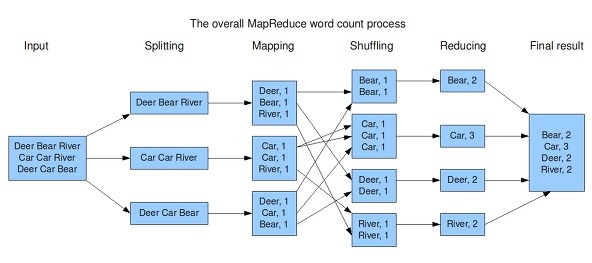




---


## ▶입출력
### 1. 기본입출력


In [0]:
a=input("숫자를 입력하세요:").split(' ')
x=int(a[0])
y=int(a[1])
print(x+y)

숫자를 입력하세요:12 32
44


### 2. 함수 리턴값

*   디폴트 인자
*   가변 인자
*   위치 인자 & 키워드 인자 
        키워드 인자와 위치 인자를 섞어 사용할 시,위치인자 우선




In [0]:
def plus (x,y,z=10):
  return x+y+z

a=plus(10,20)
b=plus(2,4,z=6)
c=plus(y=4,x=3)
print("a의 값은?",a)
print("b의 값은?",b)
print("c의 값은?",c)

testlist=[50,60,1]
d=plus(*testlist)
print("d의 값은?",d)


a의 값은? 40
b의 값은? 12
c의 값은? 17
d의 값은? 111


### 3. 에러리턴(예외처리) & ITERATOR
*   try/except/else or finally
 



In [0]:
 try:
  list1 =[1,2,3,4]
  t=("이현지",12,34)
  no=100

  make_iter=iter(list1)
  # make_i
  ter1=iter(no)
  make_iter2=iter(t)
  make_iter3=iter(range(4))

# except TypeError:
#   print('iterable 객체가 아닙니다')
# except NameError : Value error / IndexError... #여러개 에러 처리하기 
except Exception as e:                            #excetion class이용
  print("Exception 예외발생:{0}".format(e))

else:
  print("Iterable 객체입니다.")
# finally: print("a")                              #try절에서 예외 발생여부 관계없이 항상 실행


Iterable 객체입니다.


### 3. 에러리턴(예외처리)
*   오류발생시키기

In [0]:
try:
  age=int(input())
  if age <1:                     #목적에 맞게 입력받아야할 경우(문법상 오류 X)
    raise NotImplementedError
    print(age)
except NotImplementedError:
   print("AgeException")

0
AgeException




*   Exception Class 상속



In [0]:
 class AgeException(Exception):
   def __init__(self):
    super().__init__("0이상을 입력하세요")


def age():
  try: 
    age=int(input("나이:"))
    if age<1:
      raise AgeException
  except AgeException as e:
      print("예외가 발생했습니다:",e)
  else:
      print("입력값:",age) 

age()



 class AgeException(Exception):
   def __init__(self,msg):
     self.msg=msg
   def __Str__(self):
      return self.msg
# pass      

age=int(input())
if age<1:
      raise AgeException("0이상을 입력하세요")
else:
  print(age)      

나이:0
예외가 발생했습니다: 0이상을 입력하세요
